In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import ntpath

In [2]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv (r'driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', -1)# it will show all image path 
data.head()

C:\Users\20101\AppData\Local\Temp\ipykernel_9244\499491818.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)# it will show all image path


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [5]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


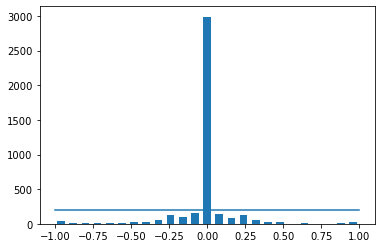

In [9]:
num_bins = 25
sample_ber_bin = 200
hist, bins = np.histogram(data["steering"], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_ber_bin, sample_ber_bin))
#print(bins)

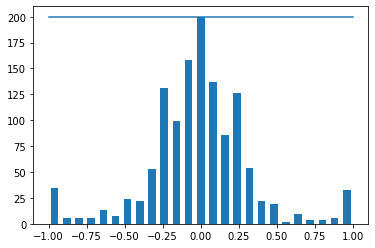

In [10]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and  data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[sample_ber_bin:]
    remove_list.extend(list_)

data.drop(data.index[remove_list], inplace= True)
hist, bins = np.histogram(data["steering"], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_ber_bin, sample_ber_bin))

In [12]:
dataDir = r"..\track-master\IMG"
def load_img_(dataDir, df):
    image_path = []
    steering = []
    for center, left, right, ang in zip(df['center'], df['left'], df['right'], df['steering']):
        image_path.append(os.path.join(dataDir, center.strip()))
        steering.append(ang)
        
        image_path.append(os.path.join(dataDir, left.strip()))
        steering.append(ang)
        
        image_path.append(os.path.join(dataDir, right.strip()))
        steering.append(ang)
        
    image_path = np.asarray(image_path)
    steering = np.asarray(steering)
    return image_path, steering

image_pathes, steering = load_img_(dataDir, data)


In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(image_pathes, steering, test_size= 0.25, random_state= 0)

Text(0.5, 1.0, 'Validation set')

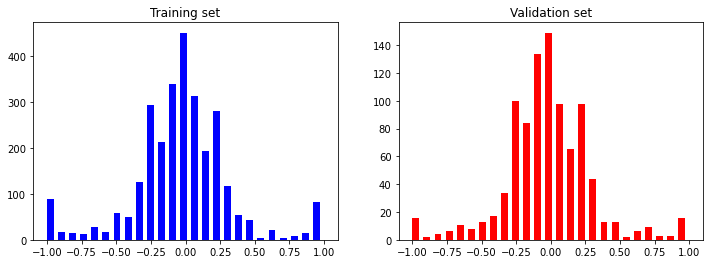

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].hist(y_train, bins= num_bins, width= 0.05, color = 'blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins= num_bins, width= 0.05, color = 'red')
axes[1].set_title('Validation set')

In [15]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

In [16]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

In [17]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

In [18]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

In [19]:
def random_augment(image, steering_angle):
    #try:
    image = mpimg.imread(image)
    #except:
        #image = 'IMG\center_2018_07_16_17_11_44_209.jpg'
        #steering_angle = 0.02400588
        #image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
        
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
        
    return image, steering_angle

In [20]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

In [21]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = np.random.randint(0, len(image_paths) - 1)

        if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

        else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]

        im = img_preprocess(im)
        batch_img.append(im)
        batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))


In [30]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24,( 5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, ( 5, 5), strides=(2, 2), activation='elu'))
    model.add(Convolution2D(48, ( 5, 5), strides=(2, 2), activation='elu'))
    model.add(Convolution2D(64,( 3, 3), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
#   model.add(Dropout(0.5))


    model.add(Flatten())

    model.add(Dense(100, activation = 'elu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation = 'elu'))
    model.add(Dropout(0.3))

    model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))
    model.add(Dense(5, activation = 'elu'))
#   model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [ ]:
model = nvidia_model()
print(model.summary())
history = model.fit(batch_generator(x_train, y_train, 2000, 1),
                                  steps_per_epoch=1500,
                                  epochs=10,
                                  validation_data=batch_generator(x_valid, y_valid, 750, 0),
                                  validation_steps=300,
                                  verbose=1,
                                  shuffle = 1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 6, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 384)               0         
                                                                 
 dense_29 (Dense)            (None, 100)              

Text(0.5, 0, 'Epoch')

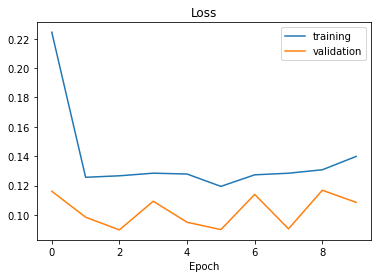

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')
